#Library And Data preparation

In [ ]:
import math
import time
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#extract data
local_zip = '/content/drive/MyDrive/resource_machine_learning/DS1.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/DST')
zip_ref.close()

In [ ]:
df_train = pd.read_csv('/tmp/DST/app_train.csv')
df_test = pd.read_csv('/tmp/DST/app_test.csv')

#Data preprocessing

##EDA

###Review struktur dataframe

In [ ]:
print("Shape df_train:", df_train.shape)
print("Shape df_test:", df_test.shape)

Shape df_train: (61503, 24)
Shape df_test: (14761, 24)


In [ ]:
df_train

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,269220,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,122096,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,130325,251159,0,Cash loans,M,2,360000.0,450000.0,44509.5,450000.0,...,-14268,-5813,-2313.0,-2709,FRIDAY,6,Electricity,0.295858,0.104877,0.616122
61499,294665,441376,1,Cash loans,F,0,441000.0,904500.0,38452.5,904500.0,...,-21582,365243,-4106.0,-4191,TUESDAY,12,NA1,0.693816,0.411595,0.239226
61500,73002,184648,0,Revolving loans,F,0,202500.0,900000.0,45000.0,900000.0,...,-17729,-1564,-11844.0,-1263,FRIDAY,16,Industry: type 12,0.802154,0.714627,NaN
61501,184610,313981,0,Cash loans,F,0,94500.0,360000.0,17509.5,360000.0,...,-11258,-4159,-5060.0,-3698,FRIDAY,15,Business Entity Type 3,NaN,0.694125,0.105473


In [ ]:
df_test

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,102590,219092,0,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,...,-17598,-2650,-1411.0,-1131,SATURDAY,7,Business Entity Type 3,NaN,0.145475,0.651260
1,35895,141577,0,Cash loans,F,0,144000.0,485640.0,34537.5,450000.0,...,-14097,-7408,-7908.0,-4872,MONDAY,14,Kindergarten,NaN,0.682675,NaN
2,69154,180205,0,Cash loans,F,1,90000.0,247500.0,8887.5,247500.0,...,-18384,-2826,-8226.0,-1930,SATURDAY,12,Self-employed,0.814700,0.686312,0.758393
3,222185,357381,0,Cash loans,M,2,112500.0,506889.0,24781.5,418500.0,...,-12170,-926,-916.0,-4048,THURSDAY,13,Other,0.399219,0.266520,0.058826
4,147680,271229,0,Cash loans,M,0,216000.0,450000.0,21888.0,450000.0,...,-10790,-577,-4640.0,-2035,MONDAY,14,Business Entity Type 3,0.368452,0.610483,0.392774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14756,38250,144293,0,Cash loans,F,1,67500.0,112500.0,7317.0,112500.0,...,-12866,-3154,-1251.0,-4395,TUESDAY,10,Government,0.570305,0.399628,0.586740
14757,148422,272093,1,Cash loans,F,1,135000.0,313438.5,21073.5,283500.0,...,-11421,-3962,-5247.0,-3795,SATURDAY,7,Self-employed,NaN,0.610758,0.368969
14758,130286,251117,0,Cash loans,F,0,157500.0,1078200.0,31522.5,900000.0,...,-13313,-2258,-3899.0,-4515,MONDAY,12,Other,NaN,0.639824,0.782608
14759,202131,334313,0,Cash loans,F,0,216000.0,272520.0,21658.5,225000.0,...,-24085,365243,-9354.0,-4740,THURSDAY,15,NA1,NaN,0.642139,0.584990


In [ ]:
with open("/tmp/DST/columns_description.csv",'r') as f:
    print(f.read())

﻿Table,Columns,Description
loanapptrain.csv / loanapptest.csv,LN_ID,Loan ID
loanapptrain.csv / loanapptest.csv,TARGET,"Target variable (1 - client with late payment more than X days, 0 - all other cases)"
loanapptrain.csv / loanapptest.csv,CONTRACT_TYPE,Identification if loan is cash or revolving
loanapptrain.csv / loanapptest.csv,GENDER,Gender of the client
loanapptrain.csv / loanapptest.csv,NUM_CHILDREN,Number of children the client has
loanapptrain.csv / loanapptest.csv,INCOME,Monthly income of the client
loanapptrain.csv / loanapptest.csv,APPROVED_CREDIT,Approved credit amount of the loan
loanapptrain.csv / loanapptest.csv,ANNUITY,Loan annuity (amount that must be paid monthly)
loanapptrain.csv / loanapptest.csv,PRICE,For consumer loans it is the price of the goods for which the loan is given
loanapptrain.csv / loanapptest.csv,INCOME_TYPE,"Clients income type (businessman, working, maternity leave,…)"
loanapptrain.csv / loanapptest.csv,EDUCATION,The client highest education
loanapp

###Cek missing value

In [ ]:
df_train.isnull().sum()

Unnamed: 0               0
LN_ID                    0
TARGET                   0
CONTRACT_TYPE            0
GENDER                   0
NUM_CHILDREN             0
INCOME                   0
APPROVED_CREDIT          0
ANNUITY                  1
PRICE                   62
INCOME_TYPE              0
EDUCATION                0
FAMILY_STATUS            0
HOUSING_TYPE             0
DAYS_AGE                 0
DAYS_WORK                0
DAYS_REGISTRATION        0
DAYS_ID_CHANGE           0
WEEKDAYS_APPLY           0
HOUR_APPLY               0
ORGANIZATION_TYPE        0
EXT_SCORE_1          34845
EXT_SCORE_2            134
EXT_SCORE_3          12239
dtype: int64

In [ ]:
df_test.isnull().sum()

Unnamed: 0              0
LN_ID                   0
TARGET                  0
CONTRACT_TYPE           0
GENDER                  0
NUM_CHILDREN            0
INCOME                  0
APPROVED_CREDIT         0
ANNUITY                 0
PRICE                  20
INCOME_TYPE             0
EDUCATION               0
FAMILY_STATUS           0
HOUSING_TYPE            0
DAYS_AGE                0
DAYS_WORK               0
DAYS_REGISTRATION       0
DAYS_ID_CHANGE          0
WEEKDAYS_APPLY          0
HOUR_APPLY              0
ORGANIZATION_TYPE       0
EXT_SCORE_1          8312
EXT_SCORE_2            19
EXT_SCORE_3          2919
dtype: int64

##Statistik deskriptif

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61503 entries, 0 to 61502
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         61503 non-null  int64  
 1   LN_ID              61503 non-null  int64  
 2   TARGET             61503 non-null  int64  
 3   CONTRACT_TYPE      61503 non-null  object 
 4   GENDER             61503 non-null  object 
 5   NUM_CHILDREN       61503 non-null  int64  
 6   INCOME             61503 non-null  float64
 7   APPROVED_CREDIT    61503 non-null  float64
 8   ANNUITY            61502 non-null  float64
 9   PRICE              61441 non-null  float64
 10  INCOME_TYPE        61503 non-null  object 
 11  EDUCATION          61503 non-null  object 
 12  FAMILY_STATUS      61503 non-null  object 
 13  HOUSING_TYPE       61503 non-null  object 
 14  DAYS_AGE           61503 non-null  int64  
 15  DAYS_WORK          61503 non-null  int64  
 16  DAYS_REGISTRATION  615

In [ ]:
df_train.describe(include="all")

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
count,61503.000000,61503.000000,61503.000000,61503,61503,61503.000000,6.150300e+04,6.150300e+04,61502.000000,6.144100e+04,...,61503.000000,61503.000000,61503.000000,61503.000000,61503,61503.000000,61503,26658.000000,6.136900e+04,49264.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7,NaN,58,NaN,NaN,NaN
top,NaN,NaN,NaN,Cash loans,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,TUESDAY,NaN,Business Entity Type 3,NaN,NaN,NaN
freq,NaN,NaN,NaN,55699,40549,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10838,NaN,13561,NaN,NaN,NaN
mean,153729.986927,278151.136416,0.080793,NaN,NaN,0.411850,1.690789e+05,5.976899e+05,27083.323315,5.369033e+05,...,-16057.481033,64882.262768,-4976.696324,-2996.374681,NaN,12.055136,NaN,0.504081,5.141378e-01,0.510787
std,88881.478853,102918.206671,0.272519,NaN,NaN,0.716686,1.339697e+05,4.016493e+05,14470.508291,3.685742e+05,...,4363.536919,142154.440320,3520.926325,1512.409598,NaN,3.273323,NaN,0.210390,1.912087e-01,0.194541
min,6.000000,100009.000000,0.000000,NaN,NaN,0.000000,2.610000e+04,4.500000e+04,2164.500000,4.500000e+04,...,-25229.000000,-17912.000000,-22928.000000,-6274.000000,NaN,0.000000,NaN,0.018334,8.173617e-08,0.000527
25%,76545.500000,188767.000000,0.000000,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16506.000000,2.385000e+05,...,-19716.500000,-2761.000000,-7479.000000,-4304.000000,NaN,10.000000,NaN,0.336294,3.926921e-01,0.370650
50%,153893.000000,278357.000000,0.000000,NaN,NaN,0.000000,1.485000e+05,5.124465e+05,24853.500000,4.500000e+05,...,-15753.000000,-1208.000000,-4498.000000,-3263.000000,NaN,12.000000,NaN,0.508522,5.658808e-01,0.535276
75%,230884.500000,367424.500000,0.000000,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,-12450.000000,-276.000000,-1996.000000,-1713.000000,NaN,14.000000,NaN,0.677160,6.637879e-01,0.667458


##Feature selection

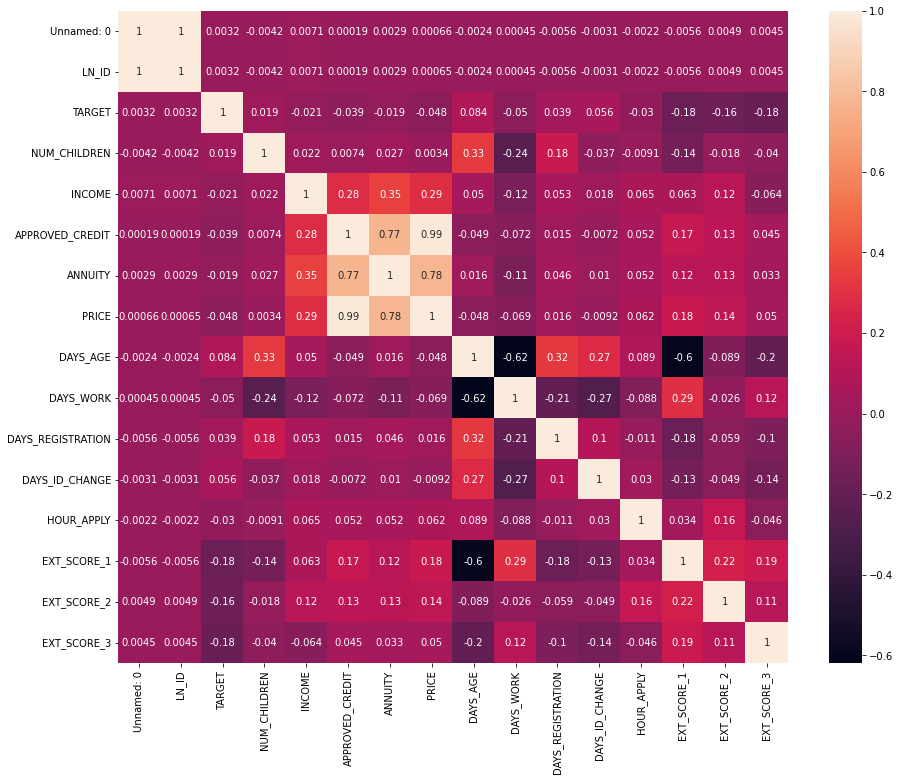

In [ ]:
corr = df_train.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr, annot=True)

plt.show()

Untuk membayar pinjaman tentunya peminjam harus memiliki pendapatan yang cukup untuk hal tersebut, maka dari itu saya menentukan kemampuan membayar mereka melalui 2 fitur lain yang berhubungan dengan pendapatan yaitu ANUITY dan PRICE yang mempunya nilai korelasi paling besar dengan pendapatan

In [ ]:
#Visualization
def bar_graph(column_feature):
    column_feature.value_counts().plot(kind="bar")

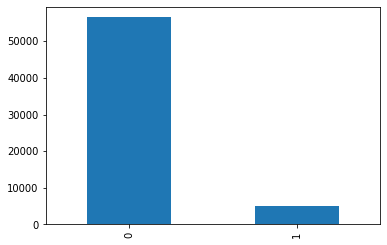

In [ ]:
bar_graph(df_train['TARGET'])

##Feature Engineering

###Cek outliers

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


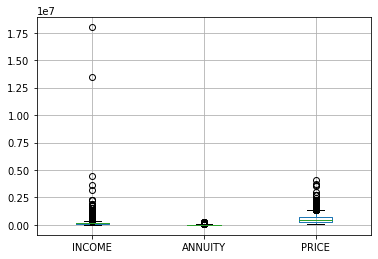

In [ ]:
df_train[['INCOME', 'ANNUITY', 'PRICE']].boxplot()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


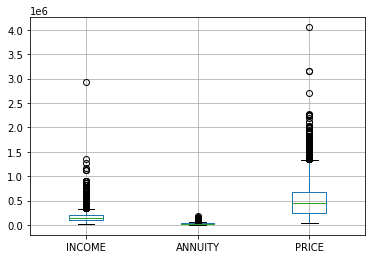

In [ ]:
df_test[['INCOME', 'ANNUITY', 'PRICE']].boxplot()
plt.show()

###Mengisi missing value

Berdasarkan pengecekan di atas pada data train memiliki missing value pada kolom ANNUITY dan PRICE dan juga kedua kolom tersebut memiliki outliers sehingga data kosong akan diisi dengan median

In [ ]:
df_train['ANNUITY'] = df_train['ANNUITY'].fillna(df_train['ANNUITY'].median())
df_train['PRICE'] = df_train['PRICE'].fillna(df_train['PRICE'].median())

In [ ]:
df_train.isnull().sum()

Unnamed: 0               0
LN_ID                    0
TARGET                   0
CONTRACT_TYPE            0
GENDER                   0
NUM_CHILDREN             0
INCOME                   0
APPROVED_CREDIT          0
ANNUITY                  0
PRICE                    0
INCOME_TYPE              0
EDUCATION                0
FAMILY_STATUS            0
HOUSING_TYPE             0
DAYS_AGE                 0
DAYS_WORK                0
DAYS_REGISTRATION        0
DAYS_ID_CHANGE           0
WEEKDAYS_APPLY           0
HOUR_APPLY               0
ORGANIZATION_TYPE        0
EXT_SCORE_1          34845
EXT_SCORE_2            134
EXT_SCORE_3          12239
dtype: int64

Berdasarkan pengecekan di atas pada data test memiliki missing value pada kolom PRICE, kolom tersebut memiliki outliers sehingga data kosong akan diisi dengan median

In [ ]:
df_test['PRICE'] = df_test['PRICE'].fillna(df_test['PRICE'].median())

In [ ]:
df_test.isnull().sum()

Unnamed: 0              0
LN_ID                   0
TARGET                  0
CONTRACT_TYPE           0
GENDER                  0
NUM_CHILDREN            0
INCOME                  0
APPROVED_CREDIT         0
ANNUITY                 0
PRICE                   0
INCOME_TYPE             0
EDUCATION               0
FAMILY_STATUS           0
HOUSING_TYPE            0
DAYS_AGE                0
DAYS_WORK               0
DAYS_REGISTRATION       0
DAYS_ID_CHANGE          0
WEEKDAYS_APPLY          0
HOUR_APPLY              0
ORGANIZATION_TYPE       0
EXT_SCORE_1          8312
EXT_SCORE_2            19
EXT_SCORE_3          2919
dtype: int64

###Class weight balancing

Karena pada feature selection diketeahui bahwa target 0 lebih banyak daripada target 1 maka pada bagian ini akan mengatur berat tiap kelas

In [ ]:
y = np.array(df_train['TARGET'])
CLASS_WEIGHT = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
CLASS_WEIGHT = dict(zip(np.unique(y), CLASS_WEIGHT))
CLASS_WEIGHT

{0: 0.5439470053419181, 1: 6.188669752465285}

###Scaling data

Karena range data yang terpaut cukup jauh maka perlu dilakukan scaling agar training menjadi lebih optimal

In [ ]:
sc = RobustScaler()

In [ ]:
Y_train = df_train[['TARGET']]
X_train = df_train[['INCOME', 'ANNUITY', 'PRICE']]

Y_test = df_test[['TARGET']]
X_test = df_test[['INCOME', 'ANNUITY', 'PRICE']]

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Model

##Model Selection

Popular algorithms that can be used for binary classification include:

* Logistic Regression
* k-Nearest Neighbors
* Decision Trees
* Support Vector Machine
* Naive Bayes

source: https://machinelearningmastery.com/types-of-classification-in-machine-learning/

##Training

###Logistic regression

In [ ]:
model1 = linear_model.LogisticRegression(class_weight=CLASS_WEIGHT)
model1.fit(X_train, Y_train.values.ravel())

LogisticRegression(class_weight={0: 0.5439470053419181, 1: 6.188669752465285})

###KNN

In [ ]:
model2 = KNeighborsClassifier(n_neighbors = 5, weights ="distance")
model2.fit(X_train, Y_train.values.ravel())

KNeighborsClassifier(weights='distance')

###Random Forest

In [ ]:
model3 = RandomForestClassifier(n_estimators=100, class_weight=CLASS_WEIGHT)

In [ ]:
model3.fit(X_train, Y_train.values.ravel())

RandomForestClassifier(class_weight={0: 0.5439470053419181,
                                     1: 6.188669752465285})

###Support Vector Machine

In [ ]:
model4 = SVC(class_weight=CLASS_WEIGHT)
model4.fit(X_train, Y_train.values.ravel())

SVC(class_weight={0: 0.5439470053419181, 1: 6.188669752465285})

###Naive bayes

In [ ]:
model5 = GaussianNB()

In [ ]:
model5.fit(X_train, Y_train.values.ravel())

GaussianNB()

##Model evaluation

In [ ]:
test_accuracy = []
test_time = []
names = ['LR','KNN','RF','SVM', 'NB']

###Accuracy & Test time

Test model 1

In [ ]:
start_time = time.time()
Y_pred1 = model1.predict(X_test)
end_time = time.time()

In [ ]:
test_time.append(end_time-start_time)
test_accuracy.append(model1.score(X_test, Y_test))

In [ ]:
print('Test time Logistic Regression:', test_time[0])
print("Akurasi Logistic Regression:", test_accuracy[0])

Test time Logistic Regression: 0.00816488265991211
Akurasi Logistic Regression: 0.4544407560463383


Test model 2

In [ ]:
start_time = time.time()
Y_pred2 = model2.predict(X_test)
end_time = time.time()

In [ ]:
test_time.append(end_time-start_time)
test_accuracy.append(model2.score(X_test, Y_test))

In [ ]:
print('Test time KNN:', test_time[1])
print("Akurasi KNN:", test_accuracy[1])

Test time KNN: 0.11490058898925781
Akurasi KNN: 0.8958742632612967


Test model 3

In [ ]:
start_time = time.time()
Y_pred3 = model3.predict(X_test)
end_time = time.time()

In [ ]:
test_time.append(end_time-start_time)
test_accuracy.append(model3.score(X_test, Y_test))

In [ ]:
print('Test time Random Forest:', test_time[2])
print("Akurasi Random Forest:", test_accuracy[2])

Test time Random Forest: 0.4757270812988281
Akurasi Random Forest: 0.8506198767021205


Test model 4

In [ ]:
start_time = time.time()
Y_pred4 = model4.predict(X_test)
end_time = time.time()

In [ ]:
test_time.append(end_time-start_time)
test_accuracy.append(model4.score(X_test, Y_test))

In [ ]:
print('Test time:', test_time[3])
print("Akurasi SVM:", test_accuracy[3])

Test time: 49.50862383842468
Akurasi SVM: 0.514328297540817


Test model 5

In [ ]:
start_time = time.time()
Y_pred5 = model5.predict(X_test)
end_time = time.time()

In [ ]:
test_time.append(end_time-start_time)
test_accuracy.append(model5.score(X_test, Y_test))

In [ ]:
print('Test time:', test_time[4])
print("Akurasi Naive Bayes:", test_accuracy[4])

Test time: 0.004961729049682617
Akurasi Naive Bayes: 0.9185014565408848


Visualisasi akurasi test

<BarContainer object of 5 artists>

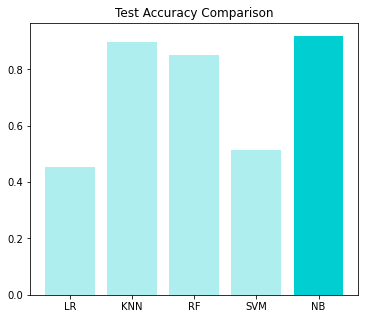

In [ ]:
plt.figure(figsize=(20,5),num=10)
plt.subplot(131)
plt.title("Test Accuracy Comparison")
colors = ["darkturquoise" if i == max(test_accuracy) else "paleturquoise" for i in test_accuracy]
plt.bar(names,test_accuracy,color=colors)

<BarContainer object of 5 artists>

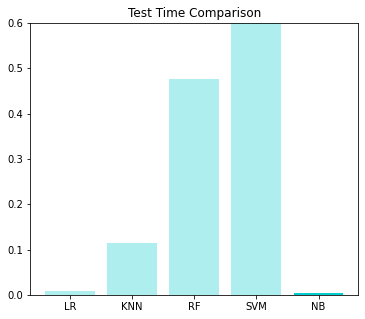

In [ ]:
plt.figure(figsize=(20,5),num=10)
plt.subplot(131)
plt.ylim(0,0.6)
plt.title("Test Time Comparison")
colors = ["darkturquoise" if i == min(test_time) else "paleturquoise" for i in test_time]
plt.bar(names,test_time,color=colors)

###Confussion metric

In [ ]:
def conf_matrix_viz(confussion_matrix):
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(confussion_matrix, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(confussion_matrix.shape[0]):
      for j in range(confussion_matrix.shape[1]):
          ax.text(x=j, y=i,s=confussion_matrix[i, j], va='center', ha='center', size='xx-large')
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

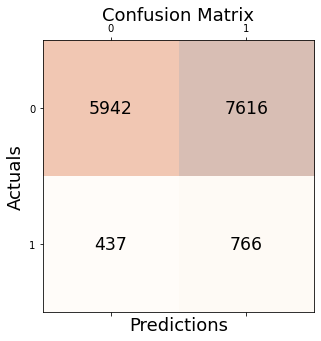

In [ ]:
conf_matrix1 = confusion_matrix(y_true=Y_test, y_pred=Y_pred1, labels=[0, 1])
conf_matrix_viz(conf_matrix1)

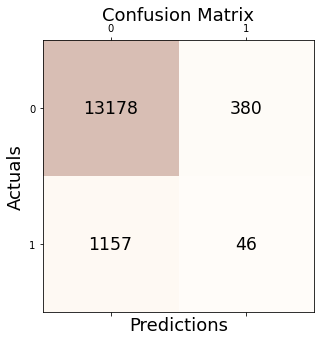

In [ ]:
conf_matrix2 = confusion_matrix(y_true=Y_test, y_pred=Y_pred2, labels=[0, 1])
conf_matrix_viz(conf_matrix2)

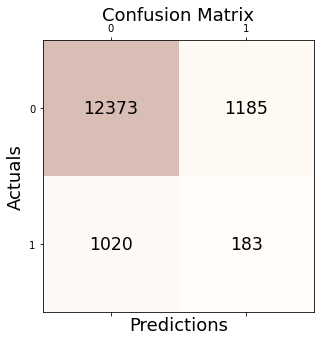

In [ ]:
conf_matrix3 = confusion_matrix(y_true=Y_test, y_pred=Y_pred3, labels=[0, 1])
conf_matrix_viz(conf_matrix3)

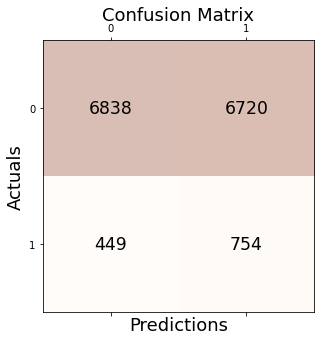

In [ ]:
conf_matrix4 = confusion_matrix(y_true=Y_test, y_pred=Y_pred4, labels=[0, 1])
conf_matrix_viz(conf_matrix4)

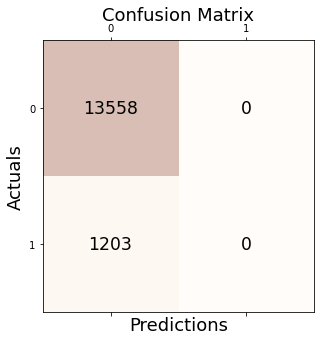

In [ ]:
conf_matrix5 = confusion_matrix(y_true=Y_test, y_pred=Y_pred5, labels=[0, 1])
conf_matrix_viz(conf_matrix5)

###Classification Report

In [ ]:
def class_report(y_pred):
  report = classification_report(Y_test,
                                   y_pred,
                                   labels=[0,1],
                                   target_names=list("01"),
                                   output_dict=True)
  return sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

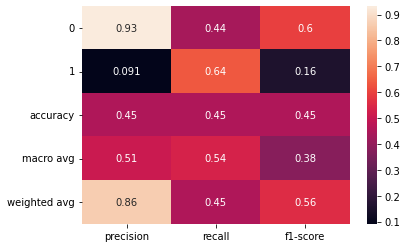

In [ ]:
class_report(Y_pred1)

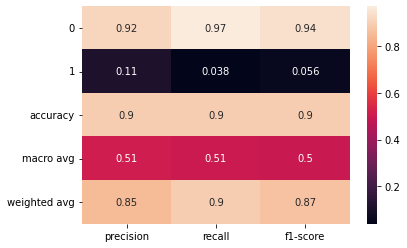

In [ ]:
class_report(Y_pred2)

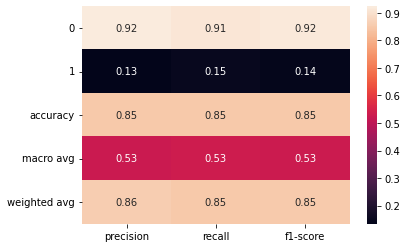

In [ ]:
class_report(Y_pred3)

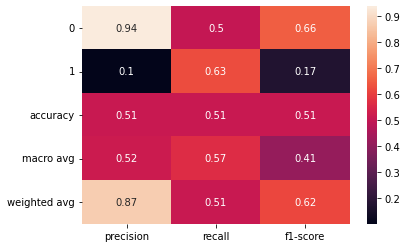

In [ ]:
class_report(Y_pred4)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


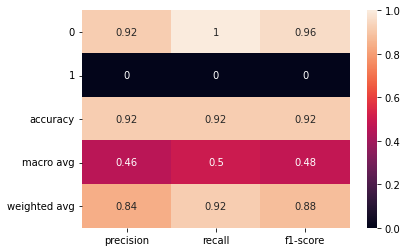

In [ ]:
class_report(Y_pred5)

#Evaluate

Berdasarkan hasil evaluasi Naive Bayes(model 5) mempunya akurasi yang tinggi dan waktu test yang sangat cepat namun berdasarkan pengujian confussion metric dan F1 score hanya menebak label 0. hal ini akan sangat berpengaruh ketika model di deploy karena model tidak bisa menilai mana yang akan kemungkinan terlambat dalam pembayaran pinjaman.

Alternatif selanjutnya adalah **KNN(model 2)** dengan accuracy tertinggi kedua, namun pada macro avg f1 score nya masih lebih rendah dari **RF(model 3)**

Dari hasil ini saya memutuskan untuk memilih **RF(model 3)** dengan pertimbangan nilai macro avg f1 score yang lebih baik